Subdivide the images of Covid + pneumonia into:
Train - validation - test sets.

Train PCA on the train set (keep 90% of info), generate component images.

Script of June 26th - ...

See: module "dim reduction", intro lesson 1.

June 27th:load the images using OpenCV.

In [1]:
# imports
import os
# import matplotlib.image as mpimg

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

import cv2

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

# Load data into a large DF (append target var as the last column). 

Adapted from the script of sizes.


In [2]:
# Fonctions purement techniques
# pour passer du chemin vers un dossier d'images
# et d'une fonction d'extraction de descripteurs
#
# à une DF avec les numéros des images et descripteurs.

def fname_num(fname: str):
    """
    'Type'_'num'.png
    (str)
    ->
    num (integer)
    
    Example:
    >>> fname_num("Viral Pneumonia-42.png")
    42
    """
    str_num = fname.split('.')[0].split('-')[-1]
    return int(str_num)


def path2DF_iter_im_cv2(path_folder):
    """
    path to folder with images
    ->

    iterator of tuples:
    image numbers, images (matrices or tensors)

    in desorder.
    """
    file_names = os.listdir(path=path_folder)
    # iter_images = ((fname_num(fname), mpimg.imread(os.path.join(path_folder, fname))) for fname in file_names)
    # +>
    iter_images = ((fname_num(fname), cv2.imread(os.path.join(path_folder, fname), cv2.IMREAD_GRAYSCALE)) for fname in file_names)    
    
    # -> cv2.imread
    return iter_images


def extract_feat_2DF_opt_cols(fun_feat, iter_img, feat_names=None):
    """
    Input.
    
    fun_feat : matrix with an image -> row vector of features;
    iter_img (iterable):
            iterator of tuples:
            image numbers, images (matrices or tensors) ;
    feat_names (list-like):  feature names, sent to the constructor of pd.DataFrame. Default=None.
    
    Output.
    DF (N * features) with:
    image number as index, 
    features as data
    """

    lst_num_shape = [(id_mat[0], fun_feat(id_mat[1])) for id_mat in iter_img]
    # list of (index, arrays of features)
    
    # Conversion dict -> sorted DF
    dict_num_shape = dict(lst_num_shape)
    df_shapes = pd.DataFrame.from_dict(dict_num_shape, orient='index', columns=feat_names)
    df_shapes = df_shapes.sort_index()
    return df_shapes


In [3]:
# Fonction pour ranger les images dans une grande DF.

def path2DF_imgs(path_folder):
    """
    The main function.
    
    path to folder with images
    ->
    DF (N * N_pixels) with:
    image number as index, 
    pixels as data.
    """
    return extract_feat_2DF_opt_cols(lambda mat: (mat.ravel()),
                            path2DF_iter_im_cv2(path_folder))


Charger les images COVID.

In [4]:
condition_2plot_COV = "COVID"
path_dir_images = os.path.join("../data", condition_2plot_COV, "images")

In [5]:
start = time.time()
DF_COV_images = path2DF_imgs(path_dir_images)
done = time.time()

elapsed = done - start
print(f'time = {elapsed:.2f} sec \n\n')
# 65 sec (Matplotlib) -> 104 sec (OpenCV)


print(DF_COV_images.shape)  # (3616, 89401)
# 89401 == 299 * 299 . 

DF_COV_images.head()


time = 101.19 sec 


(3616, 89401)


,0,1,2,3,4,5,6,7,8,9,...,89391,89392,89393,89394,89395,89396,89397,89398,89399,89400
1,185,40,0,0,0,0,0,0,0,0,...,12,21,7,0,1,1,0,1,45,167
2,194,185,186,187,185,184,185,186,185,185,...,120,123,123,121,119,114,111,111,110,111
3,99,230,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,239,157
4,15,15,16,21,26,25,25,21,15,13,...,43,68,114,112,117,81,86,111,103,84
5,226,226,227,227,227,227,227,227,227,227,...,92,90,86,88,88,87,89,89,84,83


In [6]:
# check the bounds of colors. 
print("Les couleurs se trouvent entre", DF_COV_images.to_numpy().min())  # 0
print("et", DF_COV_images.to_numpy().max())  # 255

Les couleurs se trouvent entre 0
et 255


In [7]:
print(DF_COV_images.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 1 to 3616
Columns: 89401 entries, 0 to 89400
dtypes: uint8(89401)
memory usage: 308.3 MB
None


Charger les images Pneumonie.

In [8]:
condition_2plot_Pneumo = "Viral Pneumonia"
path_dir_images = os.path.join("../data", condition_2plot_Pneumo, "images")

In [9]:
start = time.time()
DF_Pneumo_images = path2DF_imgs(path_dir_images)
done = time.time()

elapsed = done - start
print(f'time = {elapsed:.2f} sec \n\n')
# 30 sec (OpenCV)


print(DF_Pneumo_images.shape)  # (1345, 89401)
# 89401 == 299 * 299 . 

DF_Pneumo_images.head()


time = 30.51 sec 


(1345, 89401)


,0,1,2,3,4,5,6,7,8,9,...,89391,89392,89393,89394,89395,89396,89397,89398,89399,89400
1,1,1,2,3,3,3,3,4,11,17,...,0,0,0,0,0,0,0,0,0,0
2,72,74,76,75,86,114,142,152,150,143,...,0,0,0,0,0,0,0,0,0,0
3,27,30,32,33,35,37,41,46,47,49,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,2,4,4,5,6,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,2,17,23,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(DF_Pneumo_images.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 1 to 1345
Columns: 89401 entries, 0 to 89400
dtypes: uint8(89401)
memory usage: 114.7 MB
None


# show some random images.

In [11]:
IM_HEIGHT = 299
IM_WIDTH = 299
IM_SHAPE = (IM_HEIGHT, IM_WIDTH)

[ 310 2792  321 2362 1584 1563 2520  340  728 3101]


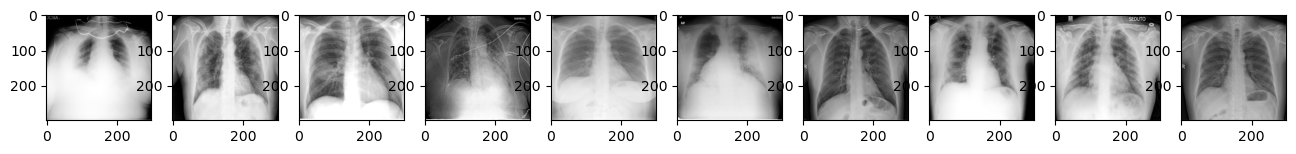

In [12]:
# random images of COVID

n_plots = 10

# Generate 'n_plots' random indices.
rng = np.random.default_rng(42)
indices = rng.choice(DF_COV_images.shape[0], size=n_plots, replace=False)
print(indices)

fig, axes = plt.subplots(1, n_plots)
fig.set_figheight(5)
fig.set_figwidth(16)
for n_plot in range(n_plots):
    axes[n_plot].imshow(DF_COV_images.iloc[indices[n_plot], :].to_numpy().reshape(IM_SHAPE),
                        cmap='gray')


[1048  540  496  864 1105  244  601  668  733 1241]


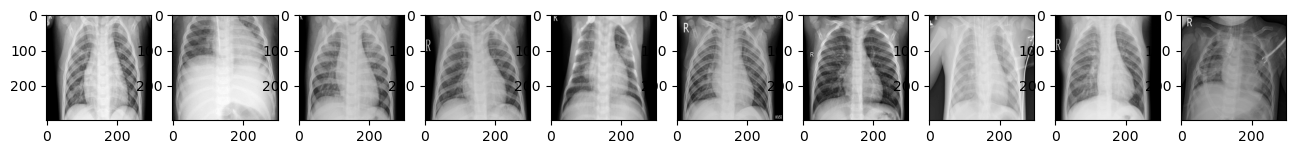

In [13]:
# random images of Pneumonia

n_plots = 10

# Generate 'n_plots' random indices.
indices = rng.choice(DF_Pneumo_images.shape[0], size=n_plots, replace=False)
print(indices)

fig, axes = plt.subplots(1, n_plots)
fig.set_figheight(5)
fig.set_figwidth(16)
for n_plot in range(n_plots):
    axes[n_plot].imshow(DF_Pneumo_images.iloc[indices[n_plot], :].to_numpy().reshape(IM_SHAPE),
                        cmap='gray')


# Concatenate DataFrames, 

In [14]:
# Append the target variable.
var_target = 'COVID'
DF_COV_images[var_target] = np.ones((DF_COV_images.shape[0],), dtype=np.uint8)

print(DF_COV_images.info())

DF_COV_images.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 1 to 3616
Columns: 89402 entries, 0 to COVID
dtypes: uint8(89402)
memory usage: 308.3 MB
None


,0,1,2,3,4,5,6,7,8,9,...,89392,89393,89394,89395,89396,89397,89398,89399,89400,COVID
1,185,40,0,0,0,0,0,0,0,0,...,21,7,0,1,1,0,1,45,167,1
2,194,185,186,187,185,184,185,186,185,185,...,123,123,121,119,114,111,111,110,111,1
3,99,230,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,239,157,1
4,15,15,16,21,26,25,25,21,15,13,...,68,114,112,117,81,86,111,103,84,1
5,226,226,227,227,227,227,227,227,227,227,...,90,86,88,88,87,89,89,84,83,1


In [15]:
# Append the target variable.

DF_Pneumo_images[var_target] = np.zeros((DF_Pneumo_images.shape[0],), dtype=np.uint8)

print(DF_Pneumo_images.info())

DF_Pneumo_images.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 1 to 1345
Columns: 89402 entries, 0 to COVID
dtypes: uint8(89402)
memory usage: 114.7 MB
None


,0,1,2,3,4,5,6,7,8,9,...,89392,89393,89394,89395,89396,89397,89398,89399,89400,COVID
1,1,1,2,3,3,3,3,4,11,17,...,0,0,0,0,0,0,0,0,0,0
2,72,74,76,75,86,114,142,152,150,143,...,0,0,0,0,0,0,0,0,0,0
3,27,30,32,33,35,37,41,46,47,49,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,2,4,4,5,6,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,2,17,23,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# concatenate the DataFrames for making the dataset of all data we work with for now
# (the masks are not used yet)
df = pd.concat((DF_COV_images, DF_Pneumo_images), axis=0)
# set index to avoid repetitions
df.set_index(np.arange(df.shape[0]), inplace=True)

print(df.shape)   # (4961, 89402) 
print(df.info())

df.head()

(4961, 89402)
<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 0 to 4960
Columns: 89402 entries, 0 to COVID
dtypes: uint8(89402)
memory usage: 423.0 MB
None


,0,1,2,3,4,5,6,7,8,9,...,89392,89393,89394,89395,89396,89397,89398,89399,89400,COVID
0,185,40,0,0,0,0,0,0,0,0,...,21,7,0,1,1,0,1,45,167,1
1,194,185,186,187,185,184,185,186,185,185,...,123,123,121,119,114,111,111,110,111,1
2,99,230,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,239,157,1
3,15,15,16,21,26,25,25,21,15,13,...,68,114,112,117,81,86,111,103,84,1
4,226,226,227,227,227,227,227,227,227,227,...,90,86,88,88,87,89,89,84,83,1


# train-validation-test split

In [17]:
# separate features, target.
data = df.drop(var_target, axis=1)
target = df[var_target]

print(data.info())  # (4961, 89401)
print('------')
print(type(target))  # Series
print(target.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 0 to 4960
Columns: 89401 entries, 0 to 89400
dtypes: uint8(89401)
memory usage: 423.0 MB
None
------
<class 'pandas.core.series.Series'>
(4961,)


In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    data,
    target,
    test_size=0.1,
    random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.2,
    random_state=1234)

print(X_train.shape)  # (3571, 89401)
print(X_val.shape)     # (893, 89401)
print(X_test.shape)    # (497, 89401)

(3571, 89401)
(893, 89401)
(497, 89401)


# train PCA on train set
Output: number of components for achieving 90% of info.

In [19]:
# (p)
pca90 = PCA(n_components=0.9)

start = time.time()
X_train_pca = pca90.fit_transform(X_train)
done = time.time()

elapsed = done - start
print(f'Time for training PCA = {elapsed:.2f} sec \n\n')

print(X_train_pca.shape)  # (3571, 50)

X_val_pca = pca90.transform(X_val)
print(X_val_pca.shape)  # (893, 50)

# About 3 mins.

Time for training PCA = 180.54 sec 


(3571, 50)
(893, 50)


PCA a réduit le nombre de colonnes de près de 90000 à 50.

# scatterplot of components 1, 2 colored according to their class

In [20]:
# (q)
def plt_scatter_dims12(data, colors):
    """
    Affiche les 2 premiéres colonnes d'une matrice.

    Args:
        data (_type_): _description_
        colors (_type_): _description_

    Returns:
        _type_: _description_
    """
    return plt.scatter(data[:, 0], data[:, 1], c=colors)

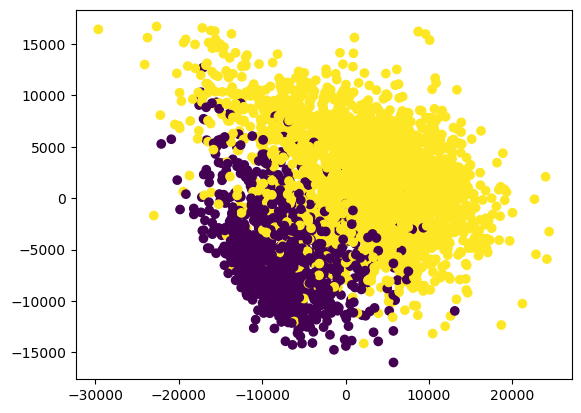

In [21]:
plt_scatter_dims12(X_train_pca, y_train)

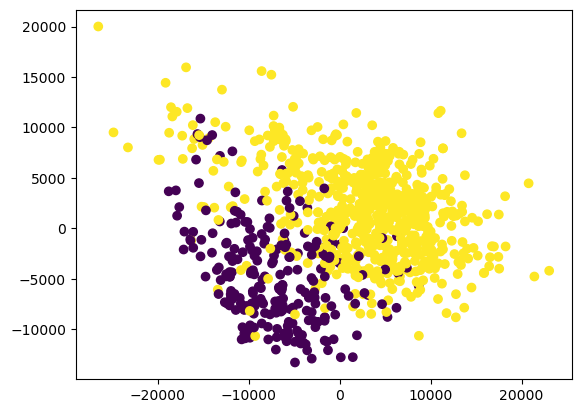

In [22]:
plt_scatter_dims12(X_val_pca, y_val)

Avec seulement 2 variables, nous voyons une séparation entre les classes!

Cercle de corrélations, eigenfaces TOADD 

Entrainer un classifieur sur le train, appliquer aux données de validation.



In [23]:
svc = SVC(C = 1, kernel = 'linear', max_iter=100, random_state=1)

start = time.time()
svc.fit(X_train_pca, y_train)
done = time.time()

elapsed = done - start
print(f'Training time on reduced data = {elapsed:.2f} sec \n\n')

print("Score on reduced data :", svc.score(X_val_pca, y_val))  # 0.87


Training time on reduced data = 0.01 sec 


Score on reduced data : 0.8689809630459127


/home/alex/anaconda3/envs/DSTest_proj_env04_bis/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [24]:
start = time.time()
svc.fit(X_train, y_train)
done = time.time()

elapsed = done - start
print(f'Training time on full data = {elapsed:.2f} sec \n\n')

print("Score on full data :", svc.score(X_val, y_val) )  # 0.76

/home/alex/anaconda3/envs/DSTest_proj_env04_bis/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training time on full data = 14.19 sec 


Score on full data : 0.7637178051511758


La performance est déjà relativement correcte, et meilleure sur les données réduites, que sur les données complètes.